In [1]:
import pandas as pd
df = pd.read_csv(r'E:\data set\task-18\Wholesale_customers.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


K-Means Clustering for Customer Segmentation

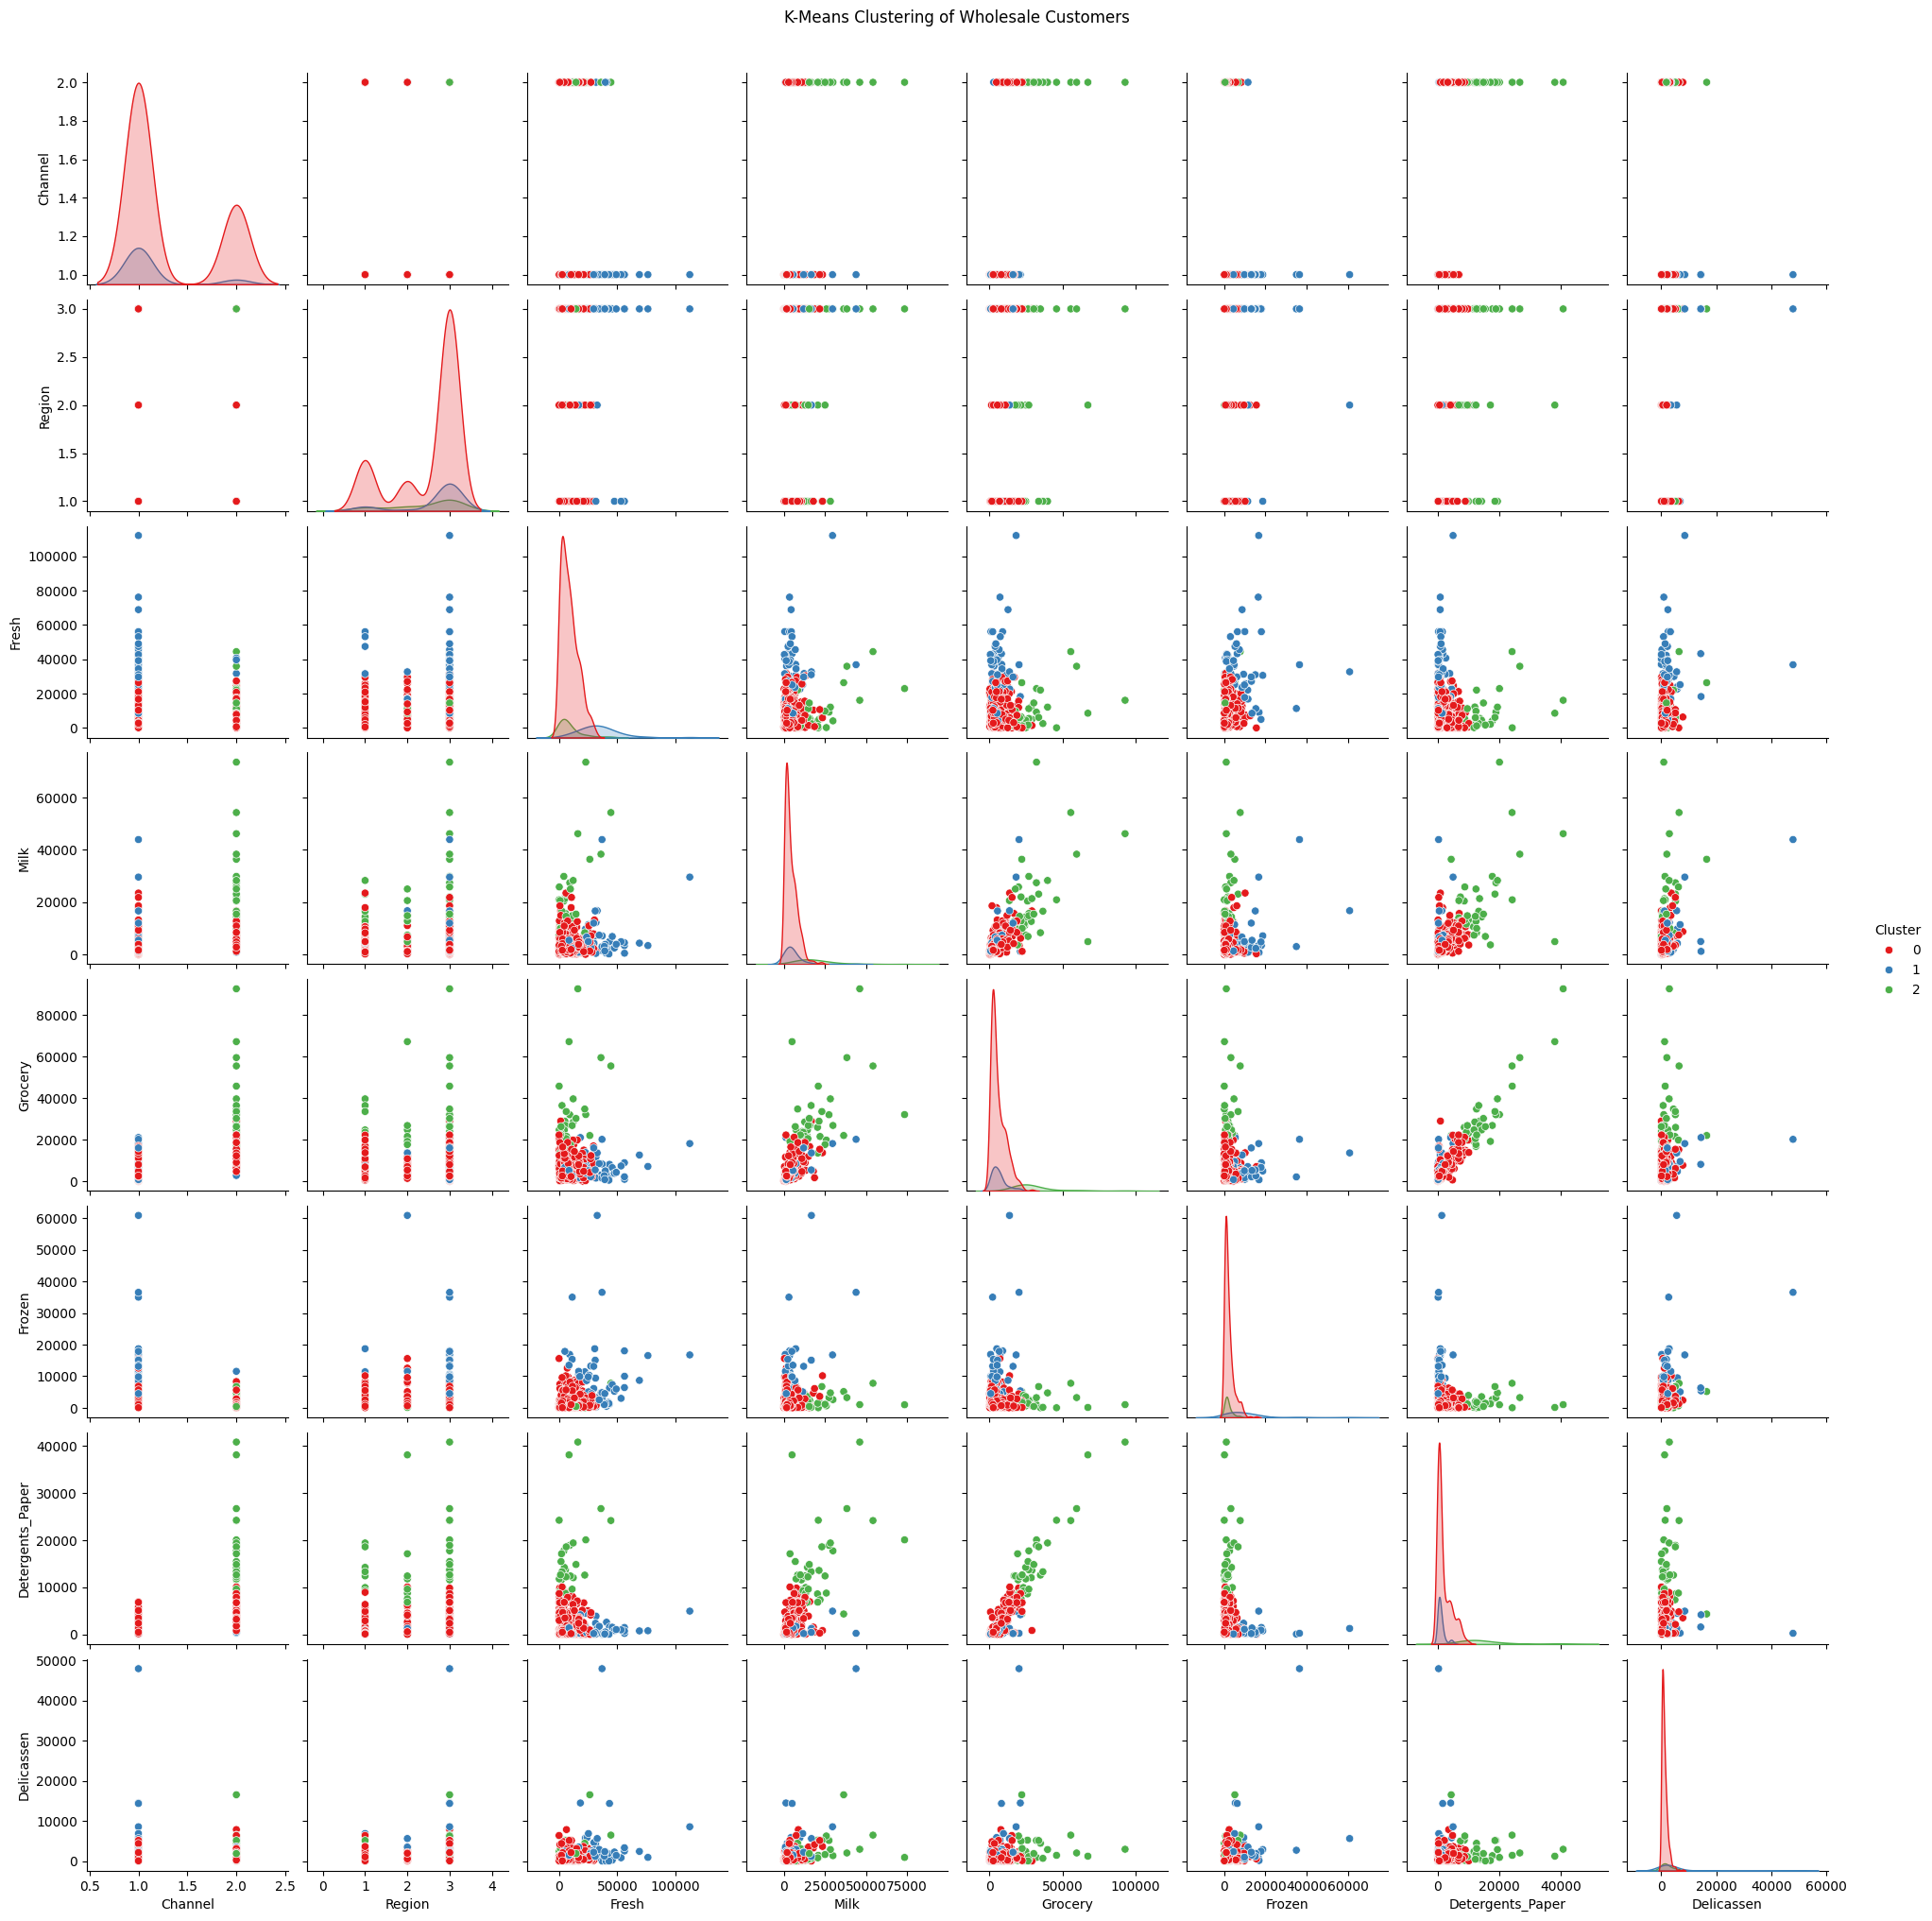

Cluster Centers:
           Fresh          Milk       Grocery       Frozen  Detergents_Paper  \
0   8935.500000   4228.528571   5848.034286  2167.231429       1913.605714   
1  34540.113208   5860.358491   6122.622642  9841.735849        981.471698   
2   8704.864865  20534.405405  30466.243243  1932.621622      14758.837838   

    Delicassen  
0  1102.120000  
1  3664.245283  
2  2459.351351  


In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
features = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualize the clusters using a pairplot
sns.pairplot(df, hue='Cluster', palette='Set1')
plt.suptitle('K-Means Clustering of Wholesale Customers', y=1.02)
plt.show()

# Visualize the cluster centers
cluster_centers = kmeans.cluster_centers_
scaled_centers = scaler.inverse_transform(cluster_centers)
cluster_centers_df = pd.DataFrame(scaled_centers, columns=features.columns)
print("Cluster Centers:\n", cluster_centers_df)


 Evaluating the Optimal Number of Clusters

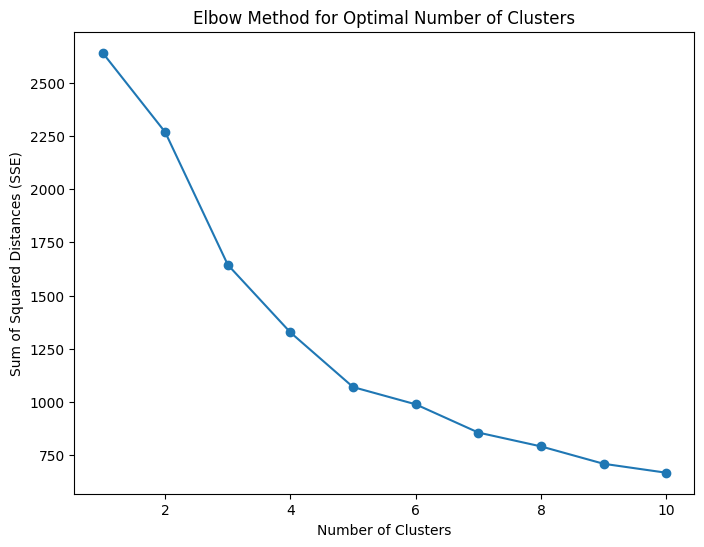

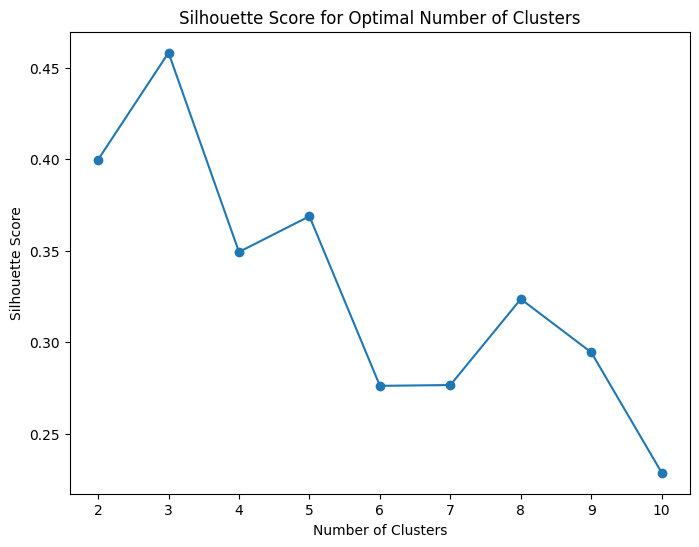

The optimal number of clusters based on Silhouette Score is 3.


In [3]:
# Import necessary libraries for evaluation
from sklearn.metrics import silhouette_score
import numpy as np

# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

# Display Silhouette Scores
optimal_clusters = np.argmax(silhouette_scores) + 2
print(f"The optimal number of clusters based on Silhouette Score is {optimal_clusters}.")


Cluster Analysis and Interpretation

Cluster Summary:
           Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.282857  2.534286   8935.500000   4228.528571   5848.034286   
1        1.113208  2.698113  34540.113208   5860.358491   6122.622642   
2        2.000000  2.405405   8704.864865  20534.405405  30466.243243   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        2167.231429       1913.605714  1102.120000  
1        9841.735849        981.471698  3664.245283  
2        1932.621622      14758.837838  2459.351351  


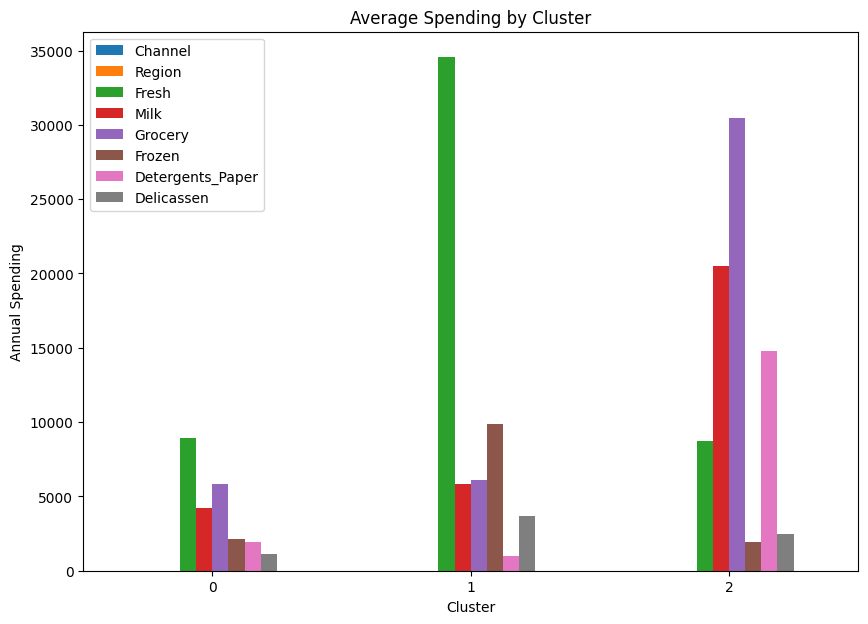

Cluster 0:
Channel                1.282857
Region                 2.534286
Fresh               8935.500000
Milk                4228.528571
Grocery             5848.034286
Frozen              2167.231429
Detergents_Paper    1913.605714
Delicassen          1102.120000
Name: 0, dtype: float64
--------------------------------------------------
Cluster 1:
Channel                 1.113208
Region                  2.698113
Fresh               34540.113208
Milk                 5860.358491
Grocery              6122.622642
Frozen               9841.735849
Detergents_Paper      981.471698
Delicassen           3664.245283
Name: 1, dtype: float64
--------------------------------------------------
Cluster 2:
Channel                 2.000000
Region                  2.405405
Fresh                8704.864865
Milk                20534.405405
Grocery             30466.243243
Frozen               1932.621622
Detergents_Paper    14758.837838
Delicassen           2459.351351
Name: 2, dtype: float64
---------

In [4]:
# Interpretation of Clusters
cluster_summary = df.groupby('Cluster').mean()
print("Cluster Summary:\n", cluster_summary)

# Visualization of Cluster Characteristics
cluster_summary.plot(kind='bar', figsize=(10, 7))
plt.title('Average Spending by Cluster')
plt.ylabel('Annual Spending')
plt.xticks(rotation=0)
plt.show()

# Detailed Interpretation
for i in range(optimal_clusters):
    print(f"Cluster {i}:")
    print(cluster_summary.iloc[i])
    print("-" * 50)


Hierarchical Clustering: Dendrogram and Cluster Formation

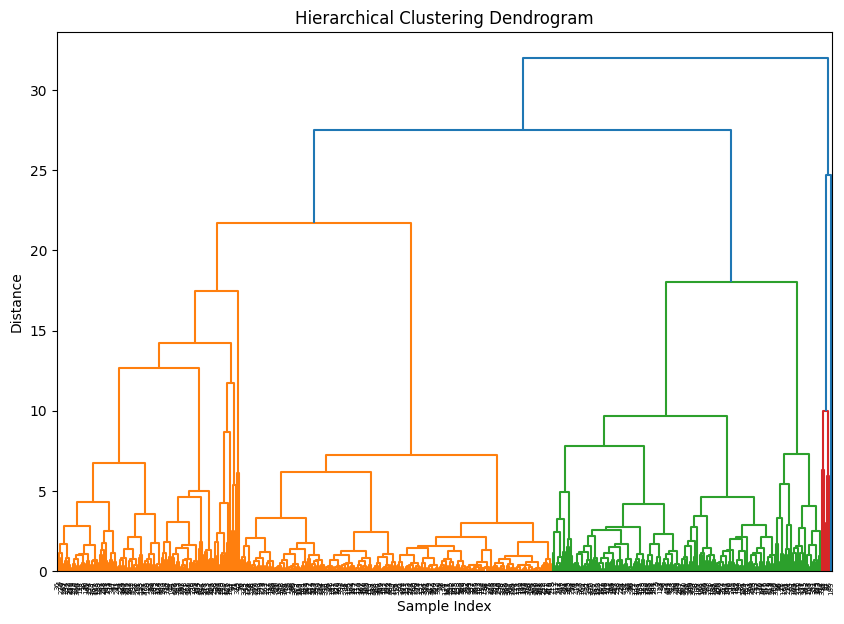

Comparison of K-Means and Hierarchical Clustering:
 Agglo_Cluster  0    1    2
Cluster                   
0              0  230  120
1              1   50    2
2              5    1   31


In [5]:
# Import necessary libraries for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Compute the linkage matrix
linked = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering
agglo_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
agglo_labels = agglo_clustering.fit_predict(scaled_features)
df['Agglo_Cluster'] = agglo_labels

# Compare with K-Means Clustering
comparison = pd.crosstab(df['Cluster'], df['Agglo_Cluster'])
print("Comparison of K-Means and Hierarchical Clustering:\n", comparison)


 Comparison of Clustering Results

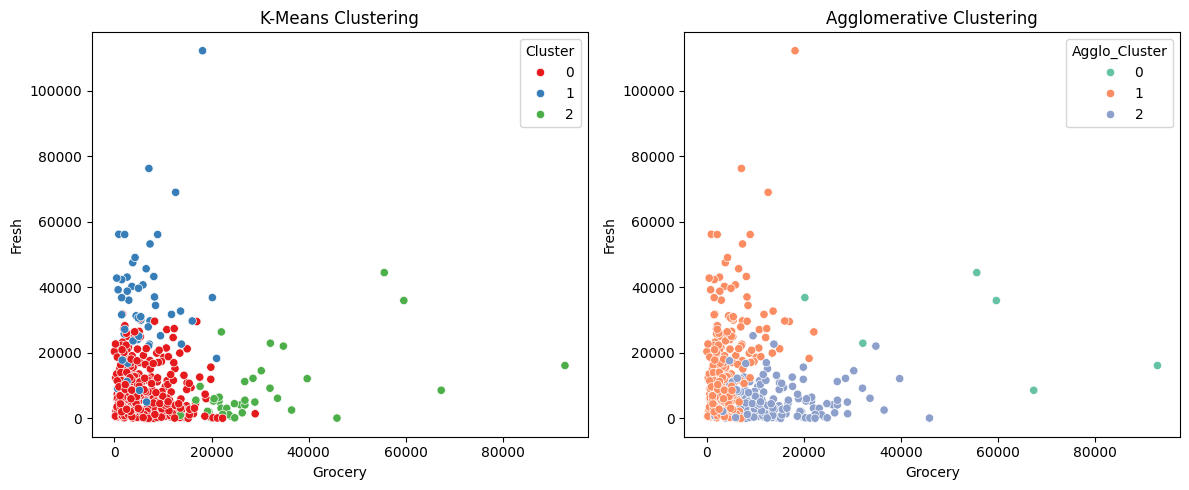

Discussion:
K-Means clustering tends to create clusters that are more compact and spherical.
Hierarchical clustering can capture different shapes and levels of cluster hierarchies.
The choice between K-Means and Hierarchical Clustering depends on the dataset characteristics and the specific use case.


In [6]:
# Visualization of cluster assignments from K-Means and Agglomerative Clustering
plt.figure(figsize=(12, 5))

# K-Means Clustering Visualization
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Grocery'], y=df['Fresh'], hue=df['Cluster'], palette='Set1')
plt.title('K-Means Clustering')

# Agglomerative Clustering Visualization
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Grocery'], y=df['Fresh'], hue=df['Agglo_Cluster'], palette='Set2')
plt.title('Agglomerative Clustering')

plt.tight_layout()
plt.show()

# Discussion of Results
print("Discussion:")
print("K-Means clustering tends to create clusters that are more compact and spherical.")
print("Hierarchical clustering can capture different shapes and levels of cluster hierarchies.")
print("The choice between K-Means and Hierarchical Clustering depends on the dataset characteristics and the specific use case.")
